In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime

In [5]:
energy = pd.read_csv('octopus.csv').rename(columns={'Unnamed: 0': 'Date'})
energy['Date'] = pd.to_datetime(energy['Date'], format='%Y-%m-%d %H:%M:%S')
energy['Week'] = energy.Date.dt.week
energy['Date_'] = energy.Date.dt.date
#energy['Time'] = energy.Date.dt.time

week_time = []
for date_time in energy.Date:
    week_time.append(datetime.timedelta(days=date_time.dayofweek, hours=date_time.hour, minutes=date_time.minute))
energy['Weektime'] = week_time

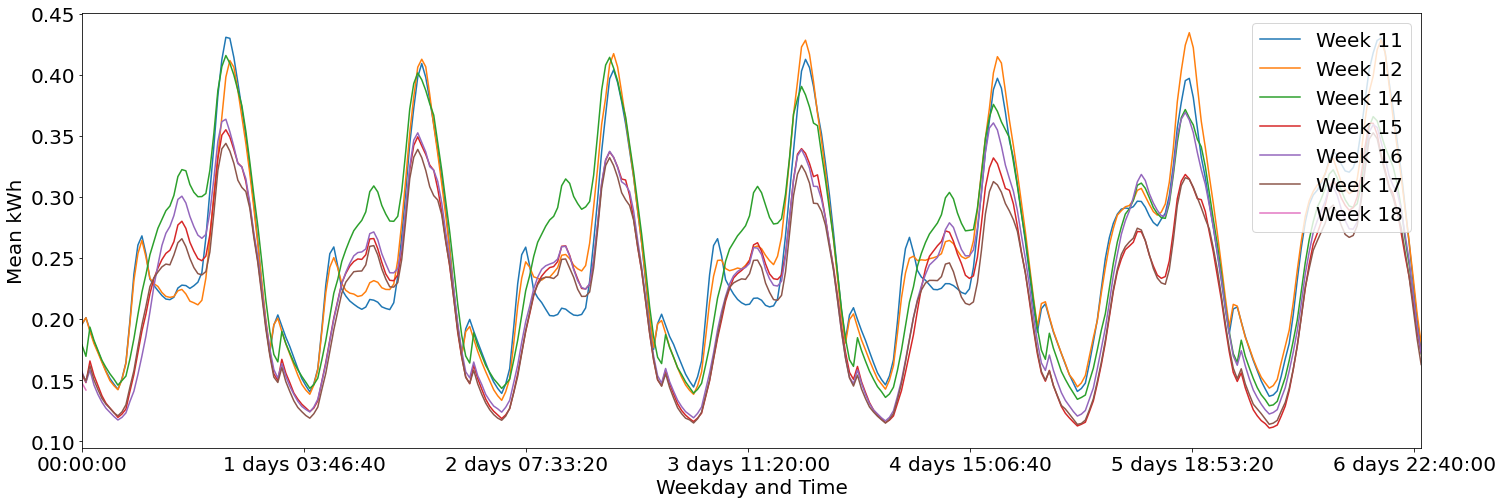

In [6]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(24,8))

for week, week_data in energy.groupby('Week'):
    week_data.plot('Weektime', 'Electricity', ax=ax, label='Week {}'.format(week))

ax.set_xlabel('Weekday and Time'); ax.set_ylabel('Mean kWh')
plt.legend(loc=1)
plt.show()

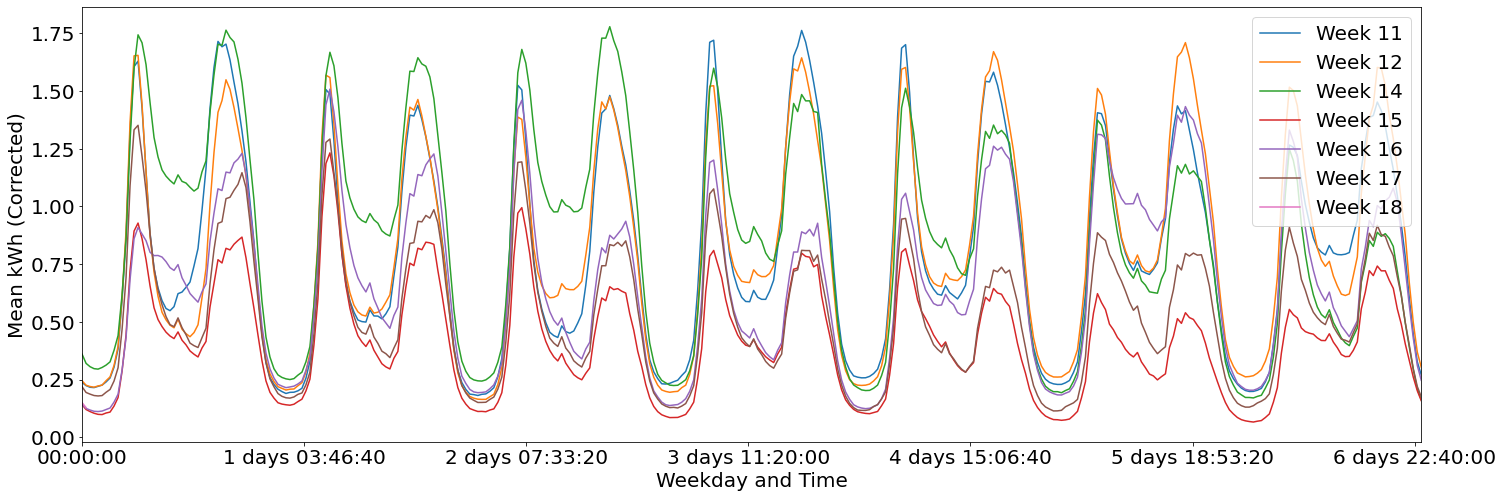

In [7]:
fig, ax = plt.subplots(figsize=(24,8))
for week, week_data in energy.groupby('Week'):
    week_data.plot('Weektime', 'Gas (corrected)', ax=ax, label='Week {}'.format(week))
ax.set_xlabel('Weekday and Time'); ax.set_ylabel('Mean kWh (Corrected)')
plt.legend(loc=1)
plt.show()

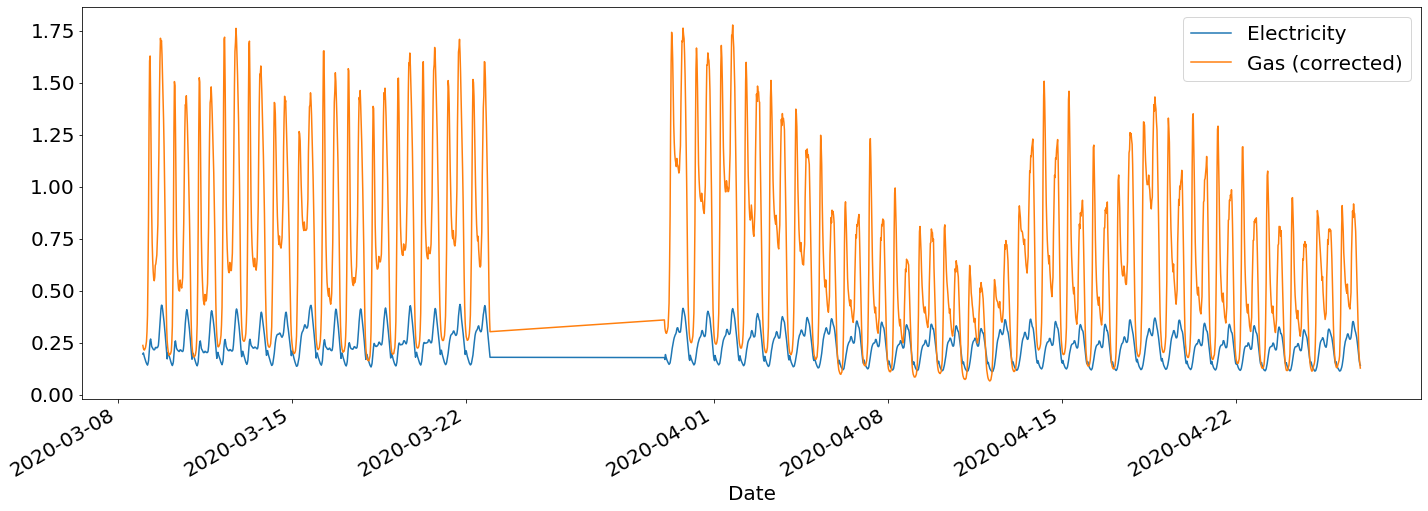

In [8]:
energy.plot('Date', ['Electricity', 'Gas (corrected)'], figsize=(24,8))
plt.show()

In [28]:
energy_average = energy.groupby('Date_').agg(electricity_daily_total = pd.NamedAgg('Electricity', np.sum),
                                             gas_daily_total = pd.NamedAgg('Gas (corrected)', np.sum)).reset_index()
energy_average.drop(energy_average.tail(1).index,inplace=True)

weather = pd.read_csv('UK_weather.csv')
weather.date = pd.to_datetime(weather['date'], format='%d/%m/%Y')
energy_and_weather = energy_average.join(weather)

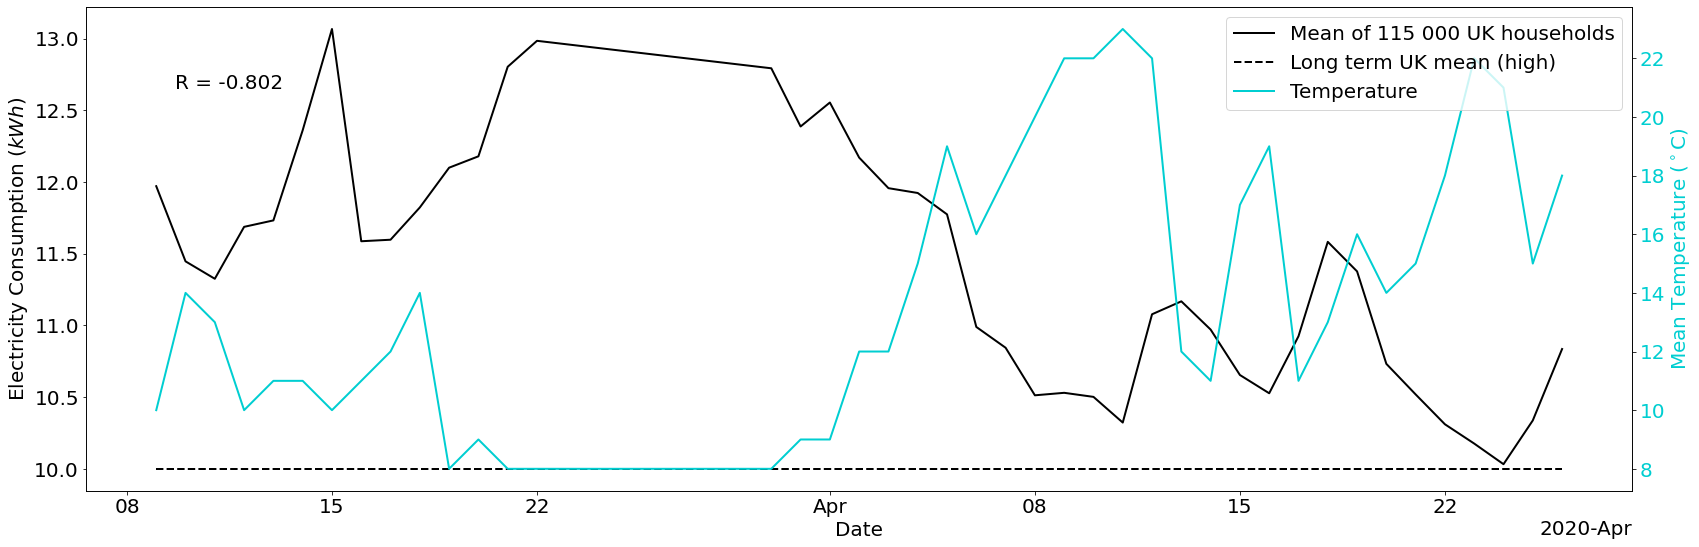

In [39]:
fig, ax1 = plt.subplots(figsize=(24,8))

locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)

color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('Electricity Consumption $(kWh)$', color=color)
#fill = ax1.fill_between(energy_average['Date_'], 8.5*np.ones(len(energy_average)), 10*np.ones(len(energy_average)), color='k', alpha=0.2)
electricity_mean = ax1.plot(energy_average['Date_'], 10*np.ones(len(energy_average)), c='k', linestyle='dashed', linewidth=2)
electricity = ax1.plot(energy_average['Date_'], energy_average['electricity_daily_total'], c='k', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Mean Temperature ($^\\circ$C)', color=color)  # we already handled the x-label with ax1
temp = ax2.plot(energy_and_weather['Date_'], energy_and_weather['temperature'], color=color, linewidth=2)

#ax2.set_ylim(0,160000)
ax2.tick_params(axis='y', labelcolor=color)

plt.text(0.01, 0.9, 'R = {0:.3f}'.format(np.corrcoef(energy_and_weather['electricity_daily_total'], energy_and_weather['temperature'])[0,1]), ha='center', va='center', transform=ax.transAxes)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend([electricity[0], electricity_mean[0], temp[0]], ['Mean of 115 000 UK households', 'Long term UK mean (high)', 'Temperature'], loc=1)
plt.show()

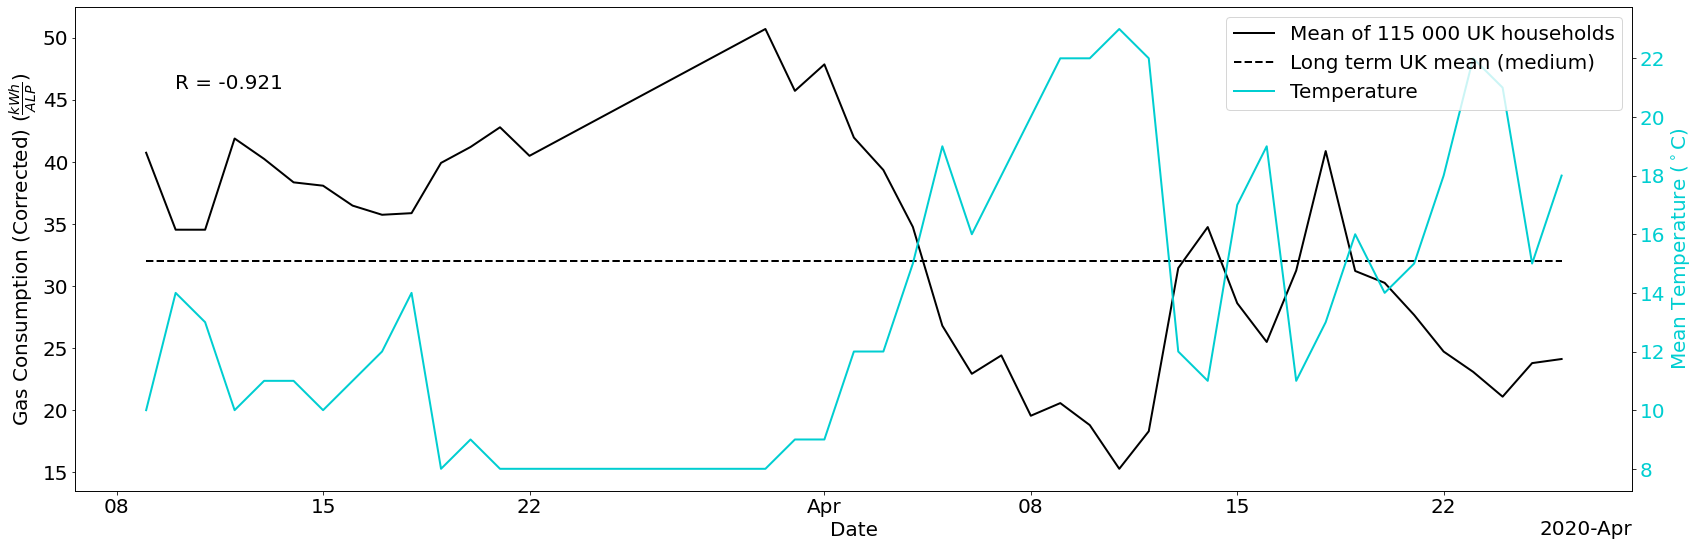

In [41]:
fig, ax1 = plt.subplots(figsize=(24,8))

locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)

color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('Gas Consumption (Corrected) $(\\frac{kWh}{ALP})$', color=color)
gas_mean = ax1.plot(energy_average['Date_'], 32*np.ones(len(energy_average)), c='k', linestyle='dashed', linewidth=2)
gas = ax1.plot(energy_and_weather['Date_'], energy_and_weather['gas_daily_total'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Mean Temperature ($^\\circ$C)', color=color)  # we already handled the x-label with ax1
temp = ax2.plot(energy_and_weather['Date_'], energy_and_weather['temperature'], color=color, linewidth=2)
#ax2.set_ylim(0,160000)
ax2.tick_params(axis='y', labelcolor=color)

plt.text(0.01, 0.9, 'R = {0:.3f}'.format(np.corrcoef(energy_and_weather['gas_daily_total'], energy_and_weather['temperature'])[0,1]), ha='center', va='center', transform=ax.transAxes)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend([gas[0], gas_mean[0], temp[0]], ['Mean of 115 000 UK households', 'Long term UK mean (medium)', 'Temperature'], loc=1)
plt.show()